## Introduction to Python, Session 5

In our last session, we covered the core concepts from chapters 1 and 2 of Social Network Analysis. This session will give us an inside look at graph traversal and do a deep dive into chapter 3. We will examine degree centrality, closeness centrality, and traversal.  

From last session, you should be familiar with the following metrics/concepts:

* Graph Diameter
* degree
* edge 
* vertex 
* Graph density
* Graph Distance 
* adjacency matrix

The first few pages up to page 44 in Chapter 3 focus more on looking at the code to read in graph data. I encourage you all to read that on your own. We are going to start with the very first concept in chapter 3. 

### Centrality 

Centrality is an incredibly powerful metric that allows the user to measure influence within a graphical network based on observed connection patterns. When performing studies on network, someone would want to find who is most important in this network. There are several sub metrics under the umbrella of centrality so we are going to dive into each one of these four. 

#### Degree Centrality 

We know that the degree of a node is the number of edges connected to the node. If we are looking at a social media netork such as twitter, then a node could be a user and each edge could be a follower. Lets look at an example: 

Lets assume we have a simple facebook friend network. We want to find who is the most popular in this friend network. We can use a built in function from the networkx library that will output degree centrality measures in a dictionary object.  

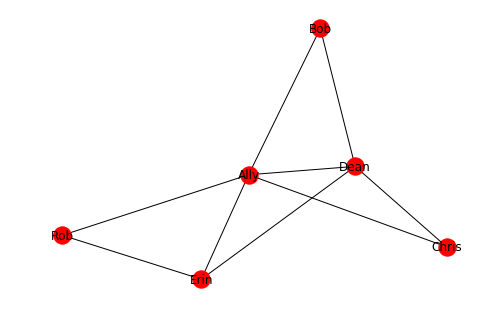

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nodes = ['Ally','Bob','Chris','Dean', 'Erin', 'Rob']
G.add_nodes_from(nodes)

edges = [('Ally','Chris'),
         ('Ally','Bob'),
         ('Bob','Dean'),
         ('Ally','Dean'),
         ('Chris','Dean'), 
         ('Erin', 'Dean'),
        ('Rob', 'Ally'), 
        ('Ally', 'Erin'),
        ('Erin', 'Rob')]

G.add_edges_from(edges)

nx.draw(G, with_labels = True)
plt.show()

In [10]:
d=nx.degree_centrality(G) 
print(d) 

{'Ally': 1.0, 'Bob': 0.4, 'Chris': 0.4, 'Dean': 0.8, 'Erin': 0.6000000000000001, 'Rob': 0.4}


According to our degree centrality measures, Ally is the most popular. 

The degree centrality for a node v is the fraction of nodes it is connected to. According the the networkx documentation, there is some additional normalization that occurs to scale the values between 0 and 1. Please keep in mind that this normalization is something that is automatically done in the networkx package. Most documentation would simply state that degree centrality is defined as follows:

$D(i)=\sum{m(i,j)}$

where m(i, j) = 1 if there exists an edge between node i and j. So for our example, We found Ally to be the most popular person. 

$D(Ally)=m(Ally,Bob)+m(Ally, Rob)+m(Ally, Erin)+m(Ally, Dean)+m(Ally,Chris)$

$D(Ally)=1+1+1+1+1=5$

The networkx function takes this number one step furthur by finding the fraction of connected nodes for Ally and normalizing across the same calculation done for each of the other node. Note that normalization can be toggled on and off.  

"The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G." In terms of interpretation, the higher the degree centrality, then the more "influence" that particular node has over the system. 


#### Closeness Centrality 

Closeness centrality considers distance. We covered distance in our last session but to recap, graph distance is the number of paths we can take to go from one node to another. In terms of what this means, closeness centrality tells us the importance of some node, based on how close this node is to the other nodes in the graph. Lets make a change to our example first before we compute closeness centrality. 


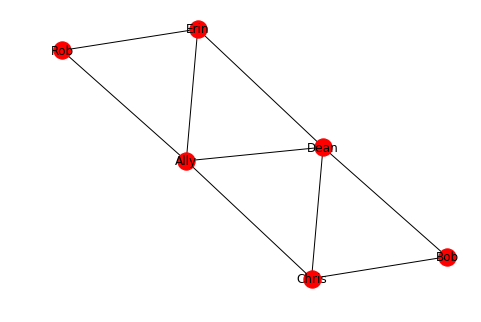

In [15]:
G = nx.Graph()

nodes = ['Ally','Bob','Chris','Dean', 'Erin', 'Rob']
G.add_nodes_from(nodes)

edges = [('Ally','Chris'),
         ('Bob','Dean'),
         ('Ally','Dean'),
         ('Chris','Dean'), 
         ('Erin', 'Dean'),
        ('Rob', 'Ally'), 
        ('Ally', 'Erin'),
        ('Erin', 'Rob'),
        ('Bob', 'Chris')]

G.add_edges_from(edges)

nx.draw(G, with_labels = True)
plt.show()

In [16]:
c=nx.closeness_centrality(G)
print(c)

{'Ally': 0.8333333333333334, 'Bob': 0.5555555555555556, 'Chris': 0.7142857142857143, 'Dean': 0.8333333333333334, 'Erin': 0.7142857142857143, 'Rob': 0.5555555555555556}


We can see that in our new graph, Dean and Ally are showing the highest closeness centrality. What is the computation actually doing?

$c(i)=\frac{n-1}{  \sum{i=1}^{n-1}{d(i, j}  }$

n is the number of nodes and d(i, j) is the shortest distance from node i to node j. Mechanically, for each ith node, we are taking the reciporcal of the sum of the shortest path going from node i to all other nodes. (n-1 enrues "all other nodes") 

Typically higher values of closeness are associated with higher centrality. 

We need to take a closer look at distance before we look at the rest of the concepts in chapter 3. 

#### Depth First Search 

DFS is an algorithm that crawls across the network to identify all possible paths from a specified source node without double counting. The algorithm backtracks as necessary to make sure a link is counted from one node to the next only once. 

In [33]:
list(nx.dfs_edges(G, source='Ally'))

[('Ally', 'Chris'),
 ('Chris', 'Dean'),
 ('Dean', 'Bob'),
 ('Dean', 'Erin'),
 ('Erin', 'Rob')]

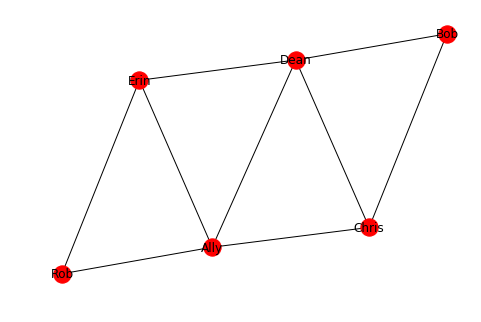

In [32]:
nx.draw(G, with_labels = True)

#### Breadth-first search

BFS is an agorithm that starts at a specified source node, and crawls to find each neighbor node before moving on to nodes at the next level of depth. In other words, it finds all nodes that have a distance of one before moving on to nodes that have a distance of 2 and so on. 

In [31]:
list(nx.bfs_edges(G, source='Ally'))

[('Ally', 'Chris'),
 ('Ally', 'Dean'),
 ('Ally', 'Rob'),
 ('Ally', 'Erin'),
 ('Chris', 'Bob')]

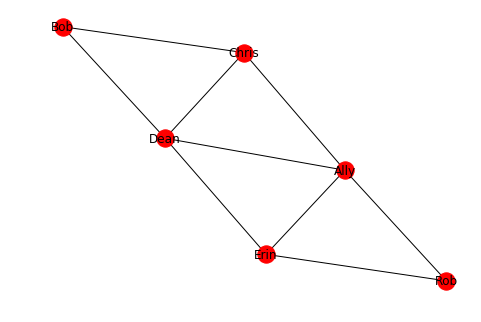

In [30]:
nx.draw(G, with_labels = True)

For next time, we are going to look at how we can apply these concepts to real sample data featured in the social network analysis book. If you have no read chapter 3, please try to do so before our next session. Doing this is going to require that you guys have a better understanding on writing our own functions so in addition to the reading, please go over the following tutorial:

https://www.learnpython.org/en/Functions